In [88]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [92]:
homicide = pd.read_csv('Homicide.csv') #read in the file 'Homicide.csv' and store it in a variable called homicide

In [93]:
homicide.shape #how many rows are in the dataset

(1015, 13)

In [106]:
homicide.set_index('Index_', inplace=True)
homicide


,X,Y,Event_Unique_ID,Occurrence_year,Division,Homicide_Type,Occurrence_Date,Hood_ID,Neighbourhood,Lat,Long,ObjectId
Index_,,,,,,,,,,,,
1,-79.392853,43.685028,111878,2004,D53,Other,2004-01-03T05:00:00.000Z,98,Rosedale-Moore Park (98),43.685028,-79.392853,1
2,-79.234962,43.781536,125755,2004,D42,Shooting,2004-01-08T05:00:00.000Z,137,Woburn (137),43.781536,-79.234962,2
3,-79.206894,43.810860,136086,2004,D42,Shooting,2004-01-08T05:00:00.000Z,132,Malvern (132),43.810860,-79.206894,3
4,-79.434403,43.670475,148623,2004,D13,Shooting,2004-01-25T05:00:00.000Z,93,Dovercourt-Wallace Emerson-Junction (93),43.670475,-79.434403,4
5,-79.203865,43.823543,148619,2004,D42,Shooting,2004-01-25T05:00:00.000Z,131,Rouge (131),43.823543,-79.203865,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1235,-79.374847,43.660656,GO-20182242344,2018,D51,Stabbing,2018-12-06T05:00:00.000Z,73,Moss Park (73),43.660656,-79.374847,1011
1236,-79.548676,43.701328,GO-20182280579,2018,D23,Shooting,2018-12-12T05:00:00.000Z,6,Kingsview Village-The Westway (6),43.701328,-79.548676,1012
1237,-79.517776,43.759018,GO-20182315055,2018,D31,Shooting,2018-12-18T05:00:00.000Z,24,Black Creek (24),43.759018,-79.517776,1013


In [34]:
homicide.groupby('Homicide_Type')['Event_Unique_ID'].count()#list the types of homicides in the order of their frequency

Homicide_Type
Other       263
Shooting    526
Stabbing    226
Name: Event_Unique_ID, dtype: int64

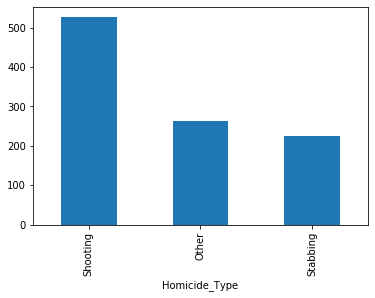

In [103]:
barplot = homicide.groupby('Homicide_Type')['Event_Unique_ID'].count().sort_values(ascending=False)
barplot.plot.bar() #plot the homicide types and their frequencies on a bar chart

In [105]:
shootings = homicide[homicide['Homicide_Type'] == 'Shooting']
shootings['Occurrence_year'].value_counts() #find the year with the highest number of shootings
#OR homicide[homicide['Homicide_Type'] == 'Shooting'].groupby('Occurrence_year')['Homicide_Type'].count().sort_values(ascending=False)

2005    53
2018    51
2007    44
2016    41
2017    39
2009    37
2008    37
2012    34
2010    32
2006    29
2011    28
2014    27
2015    26
2004    26
2013    22
Name: Occurrence_year, dtype: int64

In [111]:
homicide['Occurrence_month'] = pd.DatetimeIndex(data['Occurrence_Date']).month
#homicide['Occurrence_month'] = (homicide['Occurrence_Date'].dt.month)

In [125]:
import dateutil
def get_month_name(val):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    #error checking with try/except
    try:
        return months[val - 1]
    except:
        return val
    
homicide['Occurrence_month'] = homicide['Occurrence_month'].apply(get_month_name)

#for 2018, list the months with the highest and lowest homicides
latesthomicides = homicide[homicide['Occurrence_year'] == 2018]
latesthomicides['month'].value_counts()

Jun    13
Apr    13
Aug    12
May    10
Sep    10
Jul     9
Oct     7
Mar     6
Jan     5
Dec     5
Feb     3
Nov     3
Name: month, dtype: int64

In [99]:
homicide.groupby('Neighbourhood')['Event_Unique_ID'].count().sort_values().head() #list five safest neighborhoods

Neighbourhood
Kingsway South (15)                  1
Yonge-Eglinton (100)                 1
Newtonbrook West (36)                1
Bayview Woods-Steeles (49)           1
Runnymede-Bloor West Village (89)    2
Name: Event_Unique_ID, dtype: int64

In [98]:
stabbings = homicide[homicide['Homicide_Type'] == 'Stabbing']
stabbings['Neighbourhood'].value_counts().head() #which neighborhood had the highest number of stabbings

Downsview-Roding-CFB (26)                   8
South Riverdale (70)                        7
Glenfield-Jane Heights (25)                 5
Dovercourt-Wallace Emerson-Junction (93)    5
Thorncliffe Park (55)                       5
Name: Neighbourhood, dtype: int64

In [97]:
homicide['Occurrence_year'].value_counts()
#(optional)list the homicides by year
#hint - one way to do this is to create new column called year, get the yar from the occurence date,
#then group by your new year column

2018    96
2007    86
2005    80
2016    75
2008    70
2006    70
2017    65
2010    65
2004    64
2009    62
2015    59
2014    58
2013    57
2012    57
2011    51
Name: Occurrence_year, dtype: int64